# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Time-Series-Anomaly-Detection" data-toc-modified-id="Time-Series-Anomaly-Detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time Series Anomaly Detection</a></div><div class="lev2 toc-item"><a href="#Anomaly-detection" data-toc-modified-id="Anomaly-detection-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Anomaly detection</a></div><div class="lev2 toc-item"><a href="#Detecting-outlier-in-a-set-of-time-series" data-toc-modified-id="Detecting-outlier-in-a-set-of-time-series-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Detecting outlier in a set of time series</a></div><div class="lev2 toc-item"><a href="#Cluster-a-set-of-time-series" data-toc-modified-id="Cluster-a-set-of-time-series-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cluster a set of time series</a></div>

To run slideshow: 
```
jupyter nbconvert jupyter_slideshow_demo.ipynb --to slides --post serve
```

Reference: http://www.damian.oquanta.info/posts/make-your-slides-with-ipython.html

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(10, 5)

import statsmodels.api as sm

from IPython.display import Image 

# Time Series Anomaly Detection

## Anomaly detection

In [2]:
# np.random.seed(2)
n_days = 14
t = np.linspace(0, n_days, 24*6*n_days) 
x_trend = t*0.1 + 3
x_noiseless = 0.5*np.sin(2*np.pi * t) + np.sin(2*np.pi * 2*t) + x_trend 
noise_level = 0.4
noise = noise_level * np.random.randn(t.shape[0])
x = x_noiseless + noise

added_anomalies = [(-20, noise_level * 6), 
                   (-120, -noise_level * 7),
                   (-100, -noise_level * 5)
                  ]
t_added_anomalies= [item[0] for item in added_anomalies]
v_added_anomalies = [item[1] for item in added_anomalies] 
x[t_added_anomalies] += v_added_anomalies

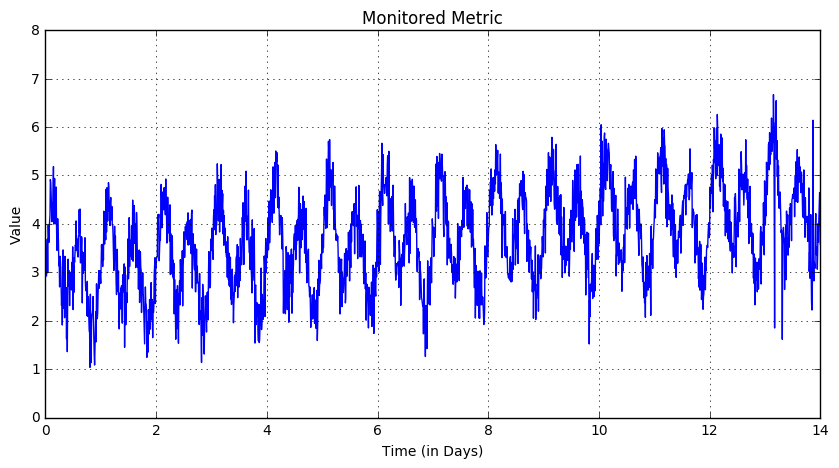

In [3]:
fig, ax = plt.subplots()

ax.plot(t, x) 
ax.set_title('Monitored Metric')
ax.set_xlabel('Time (in Days)')
ax.set_ylabel('Value')
ax.set_xlim([0, max(t)])
ax.set_ylim([0, 1.2*max(x)])

ax.grid()

fig.savefig('_.png')

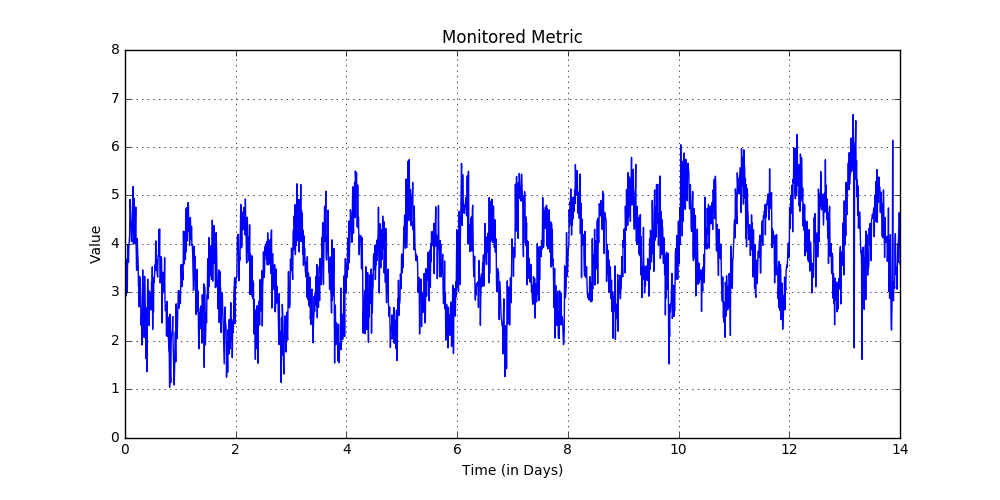

In [4]:
Image("_.png")

Noise Data. Hard to detect anomaly with static threshold.

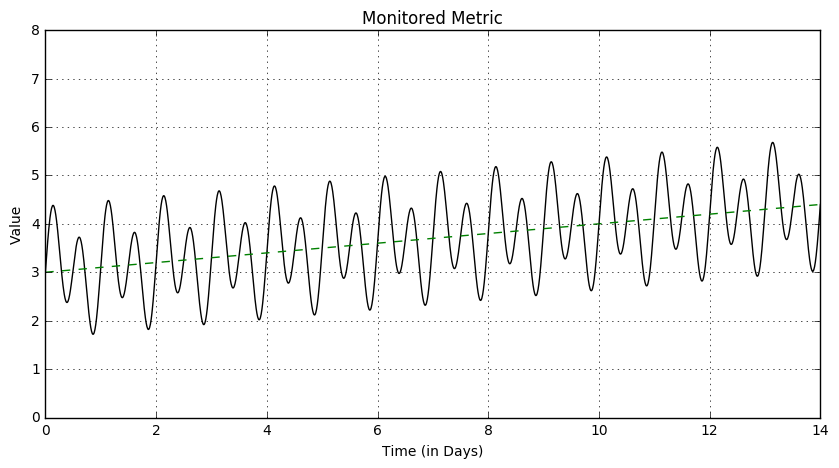

In [5]:
fig, ax = plt.subplots()

ax.plot(t, x_noiseless, 'k')
ax.plot(t, x_trend, 'g--')
ax.set_title('Monitored Metric')
ax.set_xlabel('Time (in Days)')
ax.set_ylabel('Value')
ax.set_xlim([0, max(t)])
ax.set_ylim([0, 1.2*max(x)])

ax.grid()

fig.savefig('_.png')

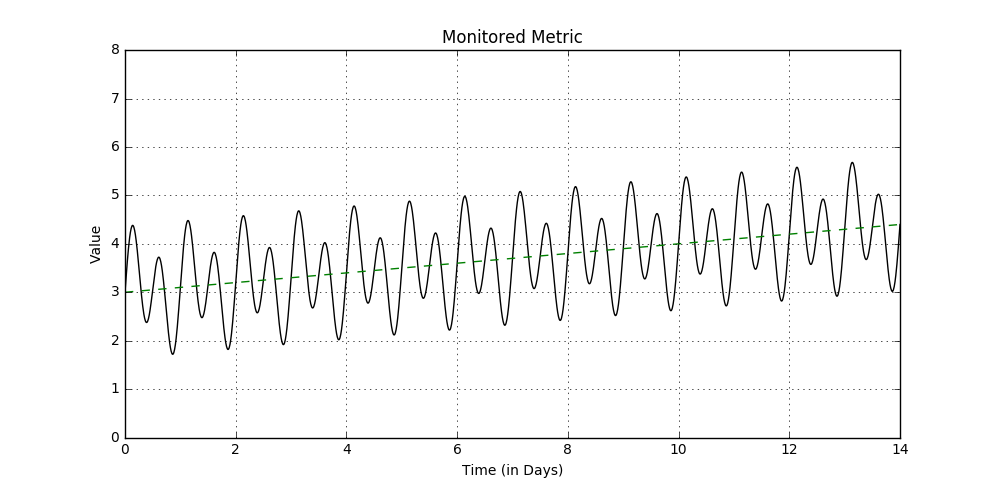

In [6]:
Image("_.png")

Use machine learning to learn a time series model with seasonality and long-term trend components.

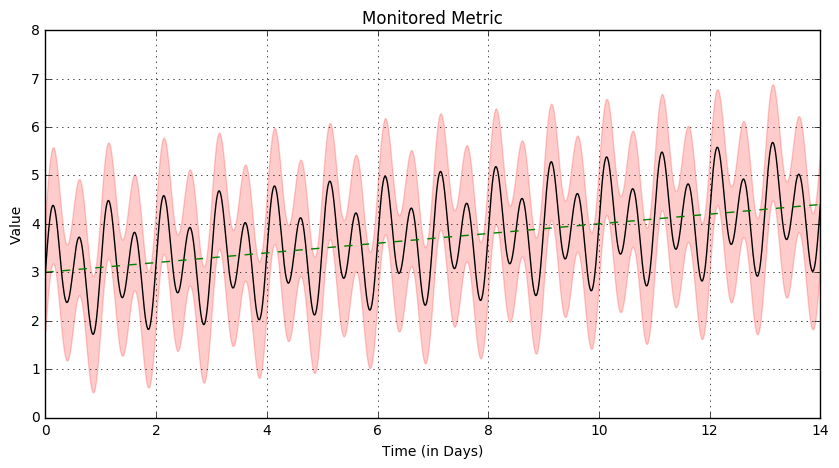

In [7]:
fig, ax = plt.subplots()

ax.plot(t, x_noiseless, 'k')
ax.plot(t, x_trend, 'g--')
ax.set_title('Monitored Metric')
ax.set_xlabel('Time (in Days)')
ax.set_ylabel('Value')
ax.set_xlim([0, max(t)])
ax.set_ylim([0, 1.2*max(x)])
lower = x_noiseless - 3*noise_level
upper = x_noiseless + 3*noise_level
ax.fill_between(t, lower, upper, color='red', facecolor='red', alpha=0.2)

ax.grid()

fig.savefig('_.png')

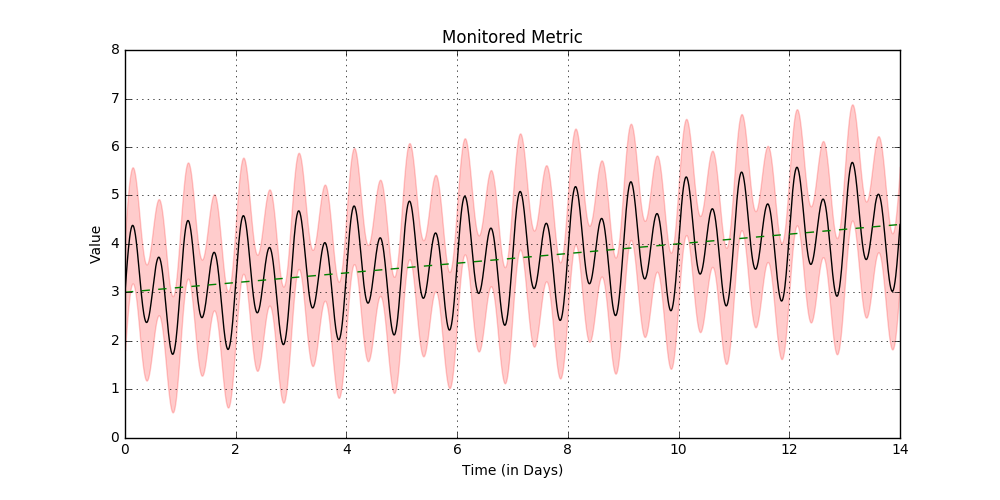

In [8]:
Image("_.png")


Define normal range around the model.

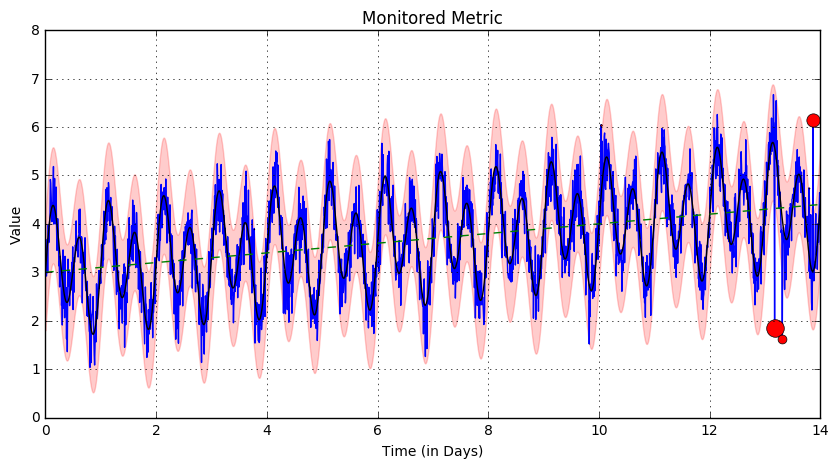

In [9]:
fig, ax = plt.subplots()

ax.plot(t, x) 
ax.plot(t, x_noiseless, 'k')
ax.plot(t, x_trend, 'g--')
ax.set_title('Monitored Metric')
ax.set_xlabel('Time (in Days)')
ax.set_ylabel('Value')
ax.set_xlim([0, max(t)])
ax.set_ylim([0, 1.2*max(x)])
lower = x_noiseless - 3*noise_level
upper = x_noiseless + 3*noise_level
ax.fill_between(t, lower, upper, color='red', facecolor='red', alpha=0.2)

for i, tm in enumerate(t):
    if x[i]>upper[i]:
        ax.plot(tm, x[i], 'ro', markersize=5*abs(x[i]-upper[i]))
    elif x[i]<lower[i]:
        ax.plot(tm, x[i], 'ro', markersize=5*abs(x[i]-lower[i]))

ax.grid()

fig.savefig('_.png')

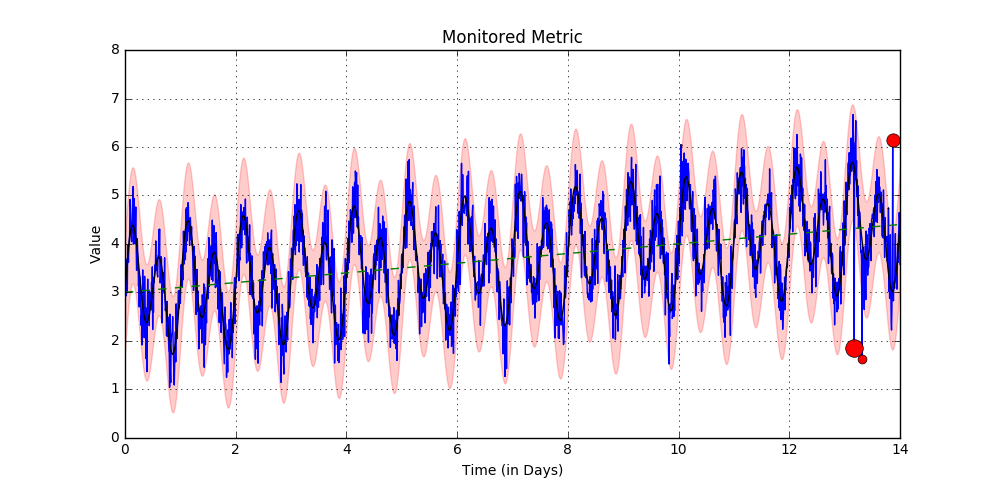

In [10]:
Image("_.png")


Anomaly scores measure how far data is out of normal range.

## Detecting outlier in a set of time series

In [11]:
np.random.seed(2)
n_days = 2

t = np.linspace(0, n_days, 24*n_days) 

noise_level = 0.01
phase_noise_level = 1
shift_noise_level = 0.01
lift = 0

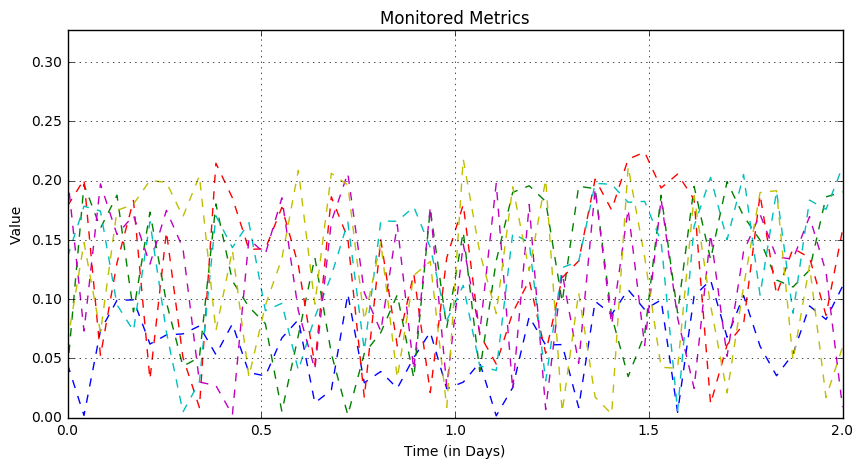

In [12]:
fig, ax = plt.subplots()

ax.set_title('Monitored Metrics')
ax.set_xlabel('Time (in Days)')
ax.set_ylabel('Value')

for i in range(1):
    x_noiseless = 0.1*np.sin(np.pi/5 * t + phase_noise_level*np.random.randn(t.shape[0]))
    noise = noise_level * np.random.randn(t.shape[0])
    x = x_noiseless + noise + shift_noise_level*np.random.randn(1)
    x = np.abs(x)
    ax.plot(t, x, '--') 

for i in range(5):
    x_noiseless = 0.2*np.sin(np.pi/7 * t + phase_noise_level*np.random.randn(t.shape[0]))
    noise = noise_level * np.random.randn(t.shape[0]) 
    x = x_noiseless + noise + shift_noise_level*np.random.randn(1)
    x = np.abs(x) + lift
    ax.plot(t, x, '--') 
    
    
ax.set_xlim([0, max(t)])
ax.set_ylim([0, 1.5*max(x)])

ax.grid()

fig.savefig('_.png')

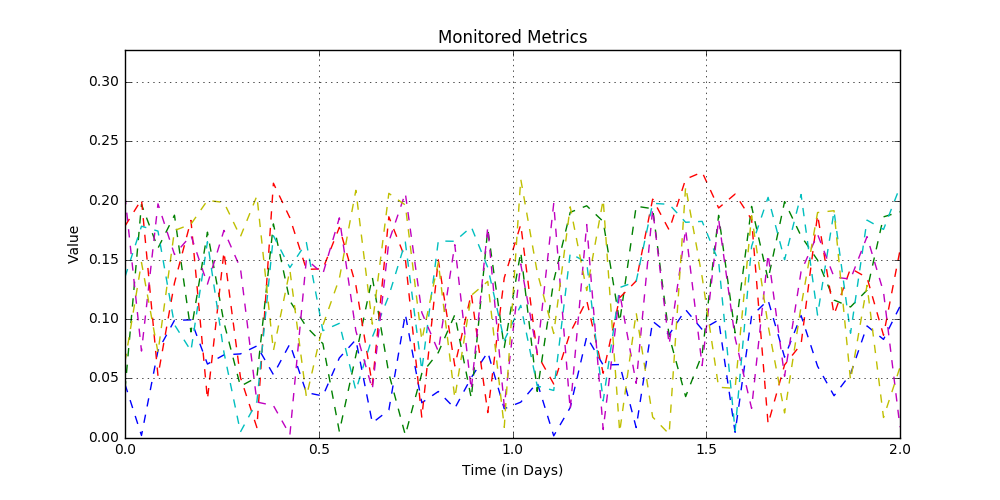

In [13]:
Image("_.png")


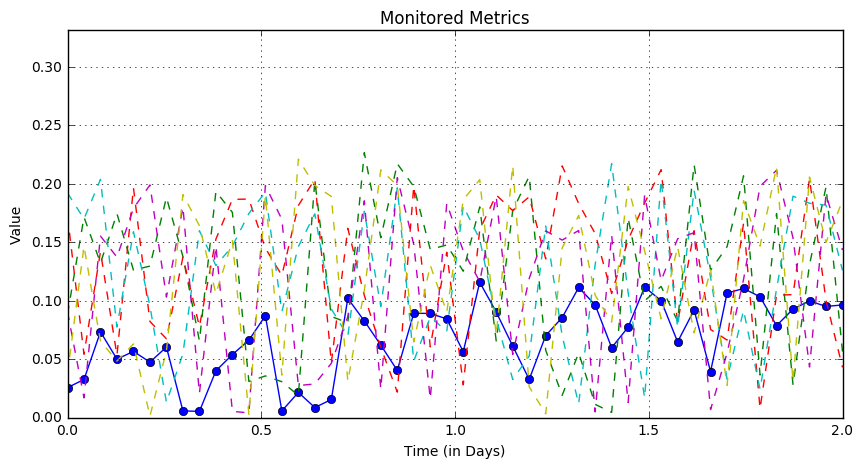

In [14]:
fig, ax = plt.subplots()

ax.set_title('Monitored Metrics')
ax.set_xlabel('Time (in Days)')
ax.set_ylabel('Value')

for i in range(1):
    x_noiseless = 0.1*np.sin(np.pi/5 * t + phase_noise_level*np.random.randn(t.shape[0]))
    noise = noise_level * np.random.randn(t.shape[0])
    x = x_noiseless + noise + shift_noise_level*np.random.randn(1)
    x = np.abs(x)
    ax.plot(t, x, '-o') 

for i in range(5):
    x_noiseless = 0.2*np.sin(np.pi/7 * t + phase_noise_level*np.random.randn(t.shape[0]))
    noise = noise_level * np.random.randn(t.shape[0]) 
    x = x_noiseless + noise + shift_noise_level*np.random.randn(1)
    x = np.abs(x) + lift
    ax.plot(t, x, '--') 
    
    
ax.set_xlim([0, max(t)])
ax.set_ylim([0, 1.5*max(x)])

ax.grid()

fig.savefig('_.png')

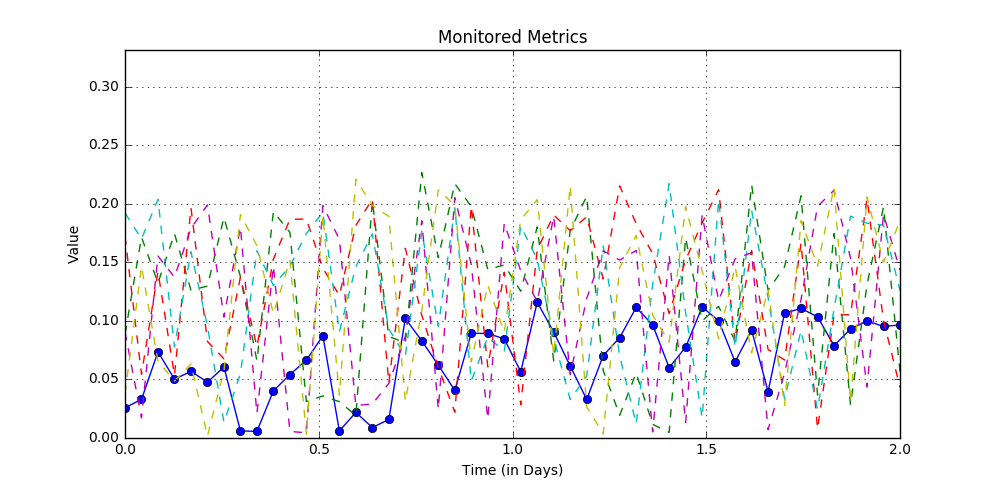

In [15]:
Image("_.png")


## Cluster a set of time series

In [16]:
np.random.seed(2)
n_days = 2

t = np.linspace(0, n_days, 24*n_days) 

noise_level = 0.01
phase_noise_level = 1
shift_noise_level = 0.01
lift = 0

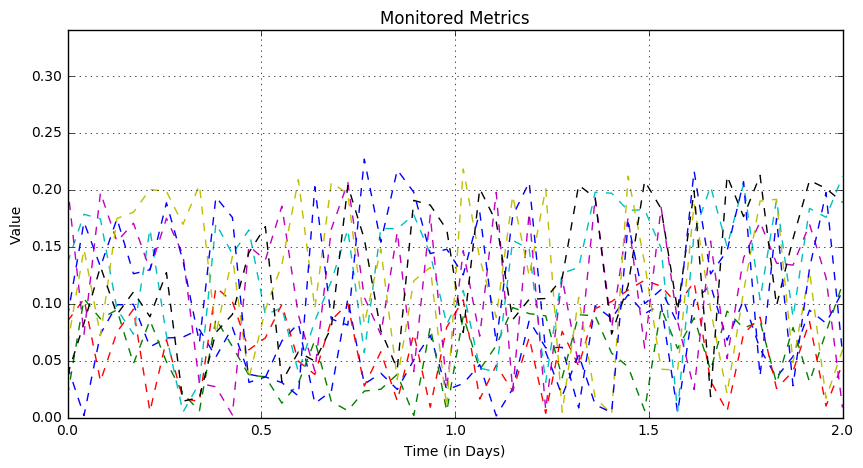

In [17]:
fig, ax = plt.subplots()

ax.set_title('Monitored Metrics')
ax.set_xlabel('Time (in Days)')
ax.set_ylabel('Value')

for i in range(3):
    x_noiseless = 0.1*np.sin(np.pi/5 * t + phase_noise_level*np.random.randn(t.shape[0]))
    noise = noise_level * np.random.randn(t.shape[0])
    x = x_noiseless + noise + shift_noise_level*np.random.randn(1)
    x = np.abs(x)
    ax.plot(t, x, '--') 

for i in range(5):
    x_noiseless = 0.2*np.sin(np.pi/7 * t + phase_noise_level*np.random.randn(t.shape[0]))
    noise = noise_level * np.random.randn(t.shape[0]) 
    x = x_noiseless + noise + shift_noise_level*np.random.randn(1)
    x = np.abs(x) + lift
    ax.plot(t, x, '--') 
    
    
ax.set_xlim([0, max(t)])
ax.set_ylim([0, 1.5*max(x)])

ax.grid()

fig.savefig('_.png')

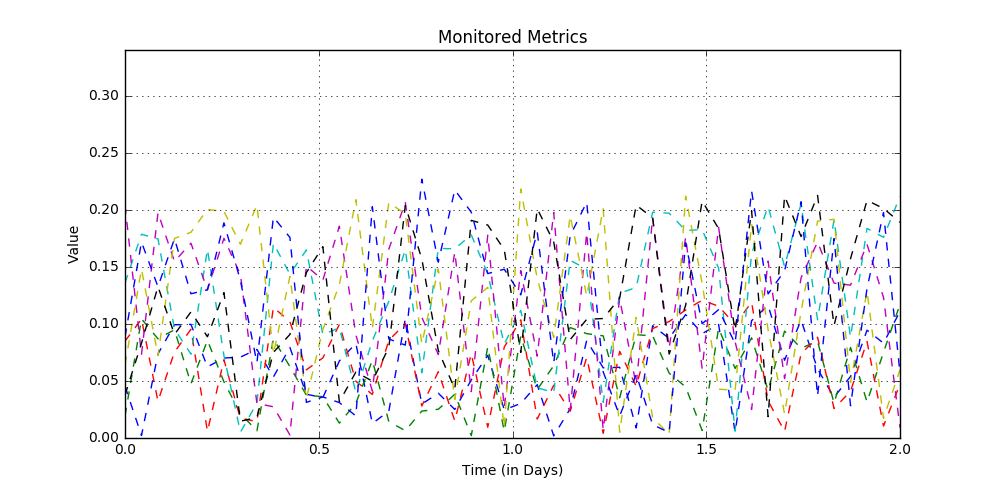

In [18]:
Image("_.png")


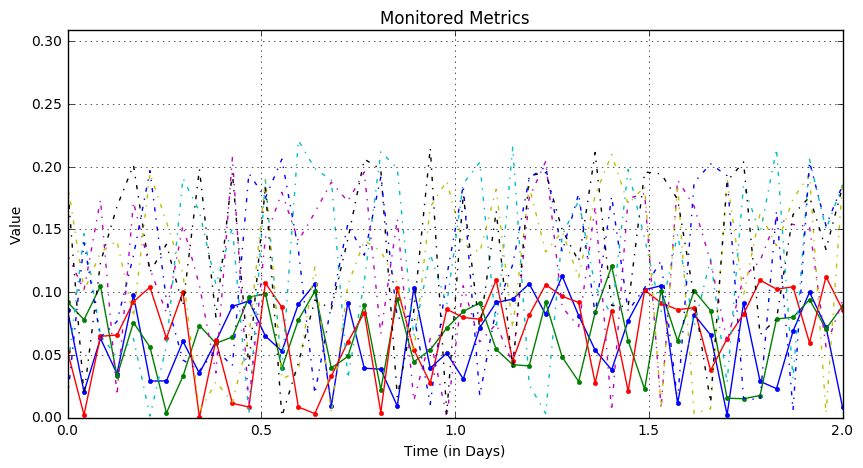

In [19]:
fig, ax = plt.subplots()

ax.set_title('Monitored Metrics')
ax.set_xlabel('Time (in Days)')
ax.set_ylabel('Value')

for i in range(3):
    x_noiseless = 0.1*np.sin(np.pi/5 * t + phase_noise_level*np.random.randn(t.shape[0]))
    noise = noise_level * np.random.randn(t.shape[0])
    x = x_noiseless + noise + shift_noise_level*np.random.randn(1)
    x = np.abs(x)
    ax.plot(t, x, '.-') 

for i in range(5):
    x_noiseless = 0.2*np.sin(np.pi/7 * t + phase_noise_level*np.random.randn(t.shape[0]))
    noise = noise_level * np.random.randn(t.shape[0]) 
    x = x_noiseless + noise + shift_noise_level*np.random.randn(1)
    x = np.abs(x) + lift
    ax.plot(t, x, '-.') 
    
    
ax.set_xlim([0, max(t)])
ax.set_ylim([0, 1.5*max(x)])

ax.grid()

fig.savefig('_.png')

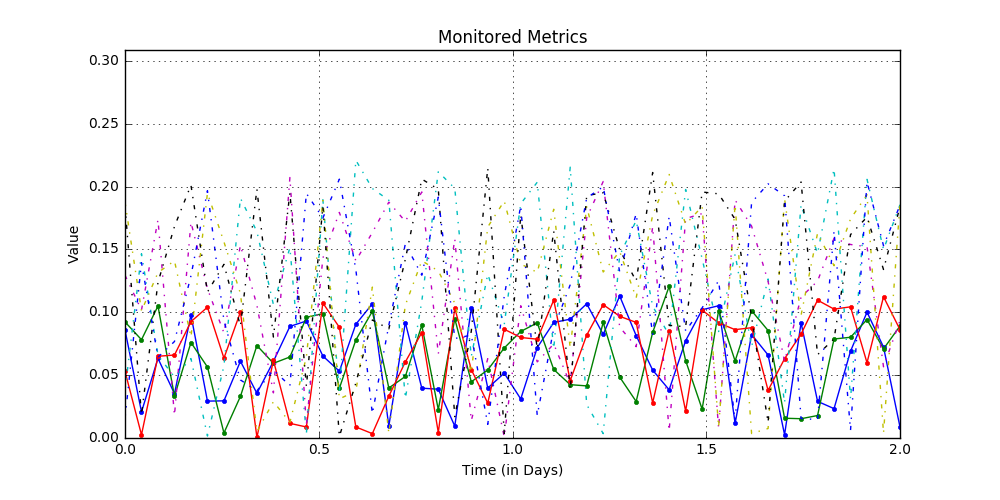

In [20]:
Image("_.png")
